In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/ToyotaCorolla - MLR.csv')

In [3]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [6]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
numerical_features=['Age_08_04','KM','HP','cc','Doors','Gears','Weight','Price']
categorical_feature=['Fuel_Type','Color','Automatic_Gear']

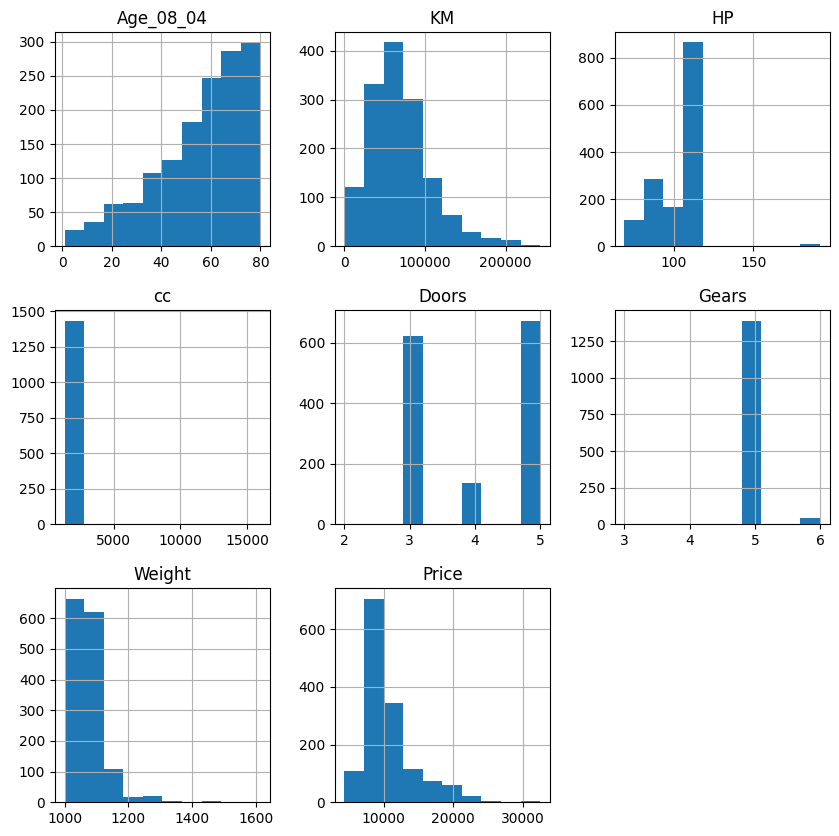

In [8]:
data[numerical_features].hist(figsize=(10,10))
plt.show()

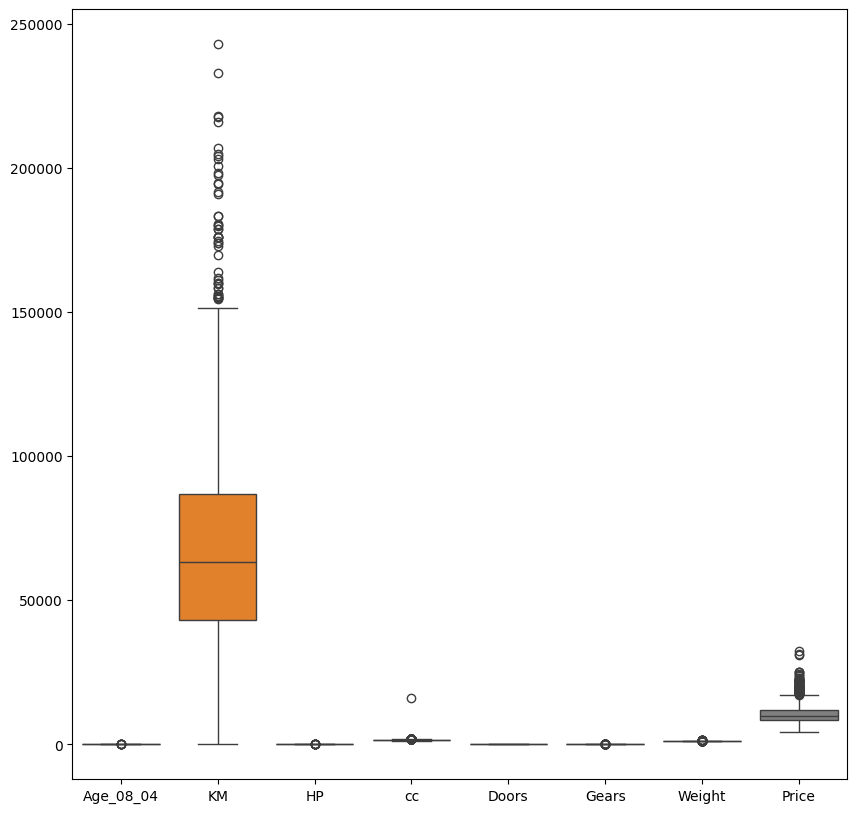

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data[numerical_features])
plt.show()

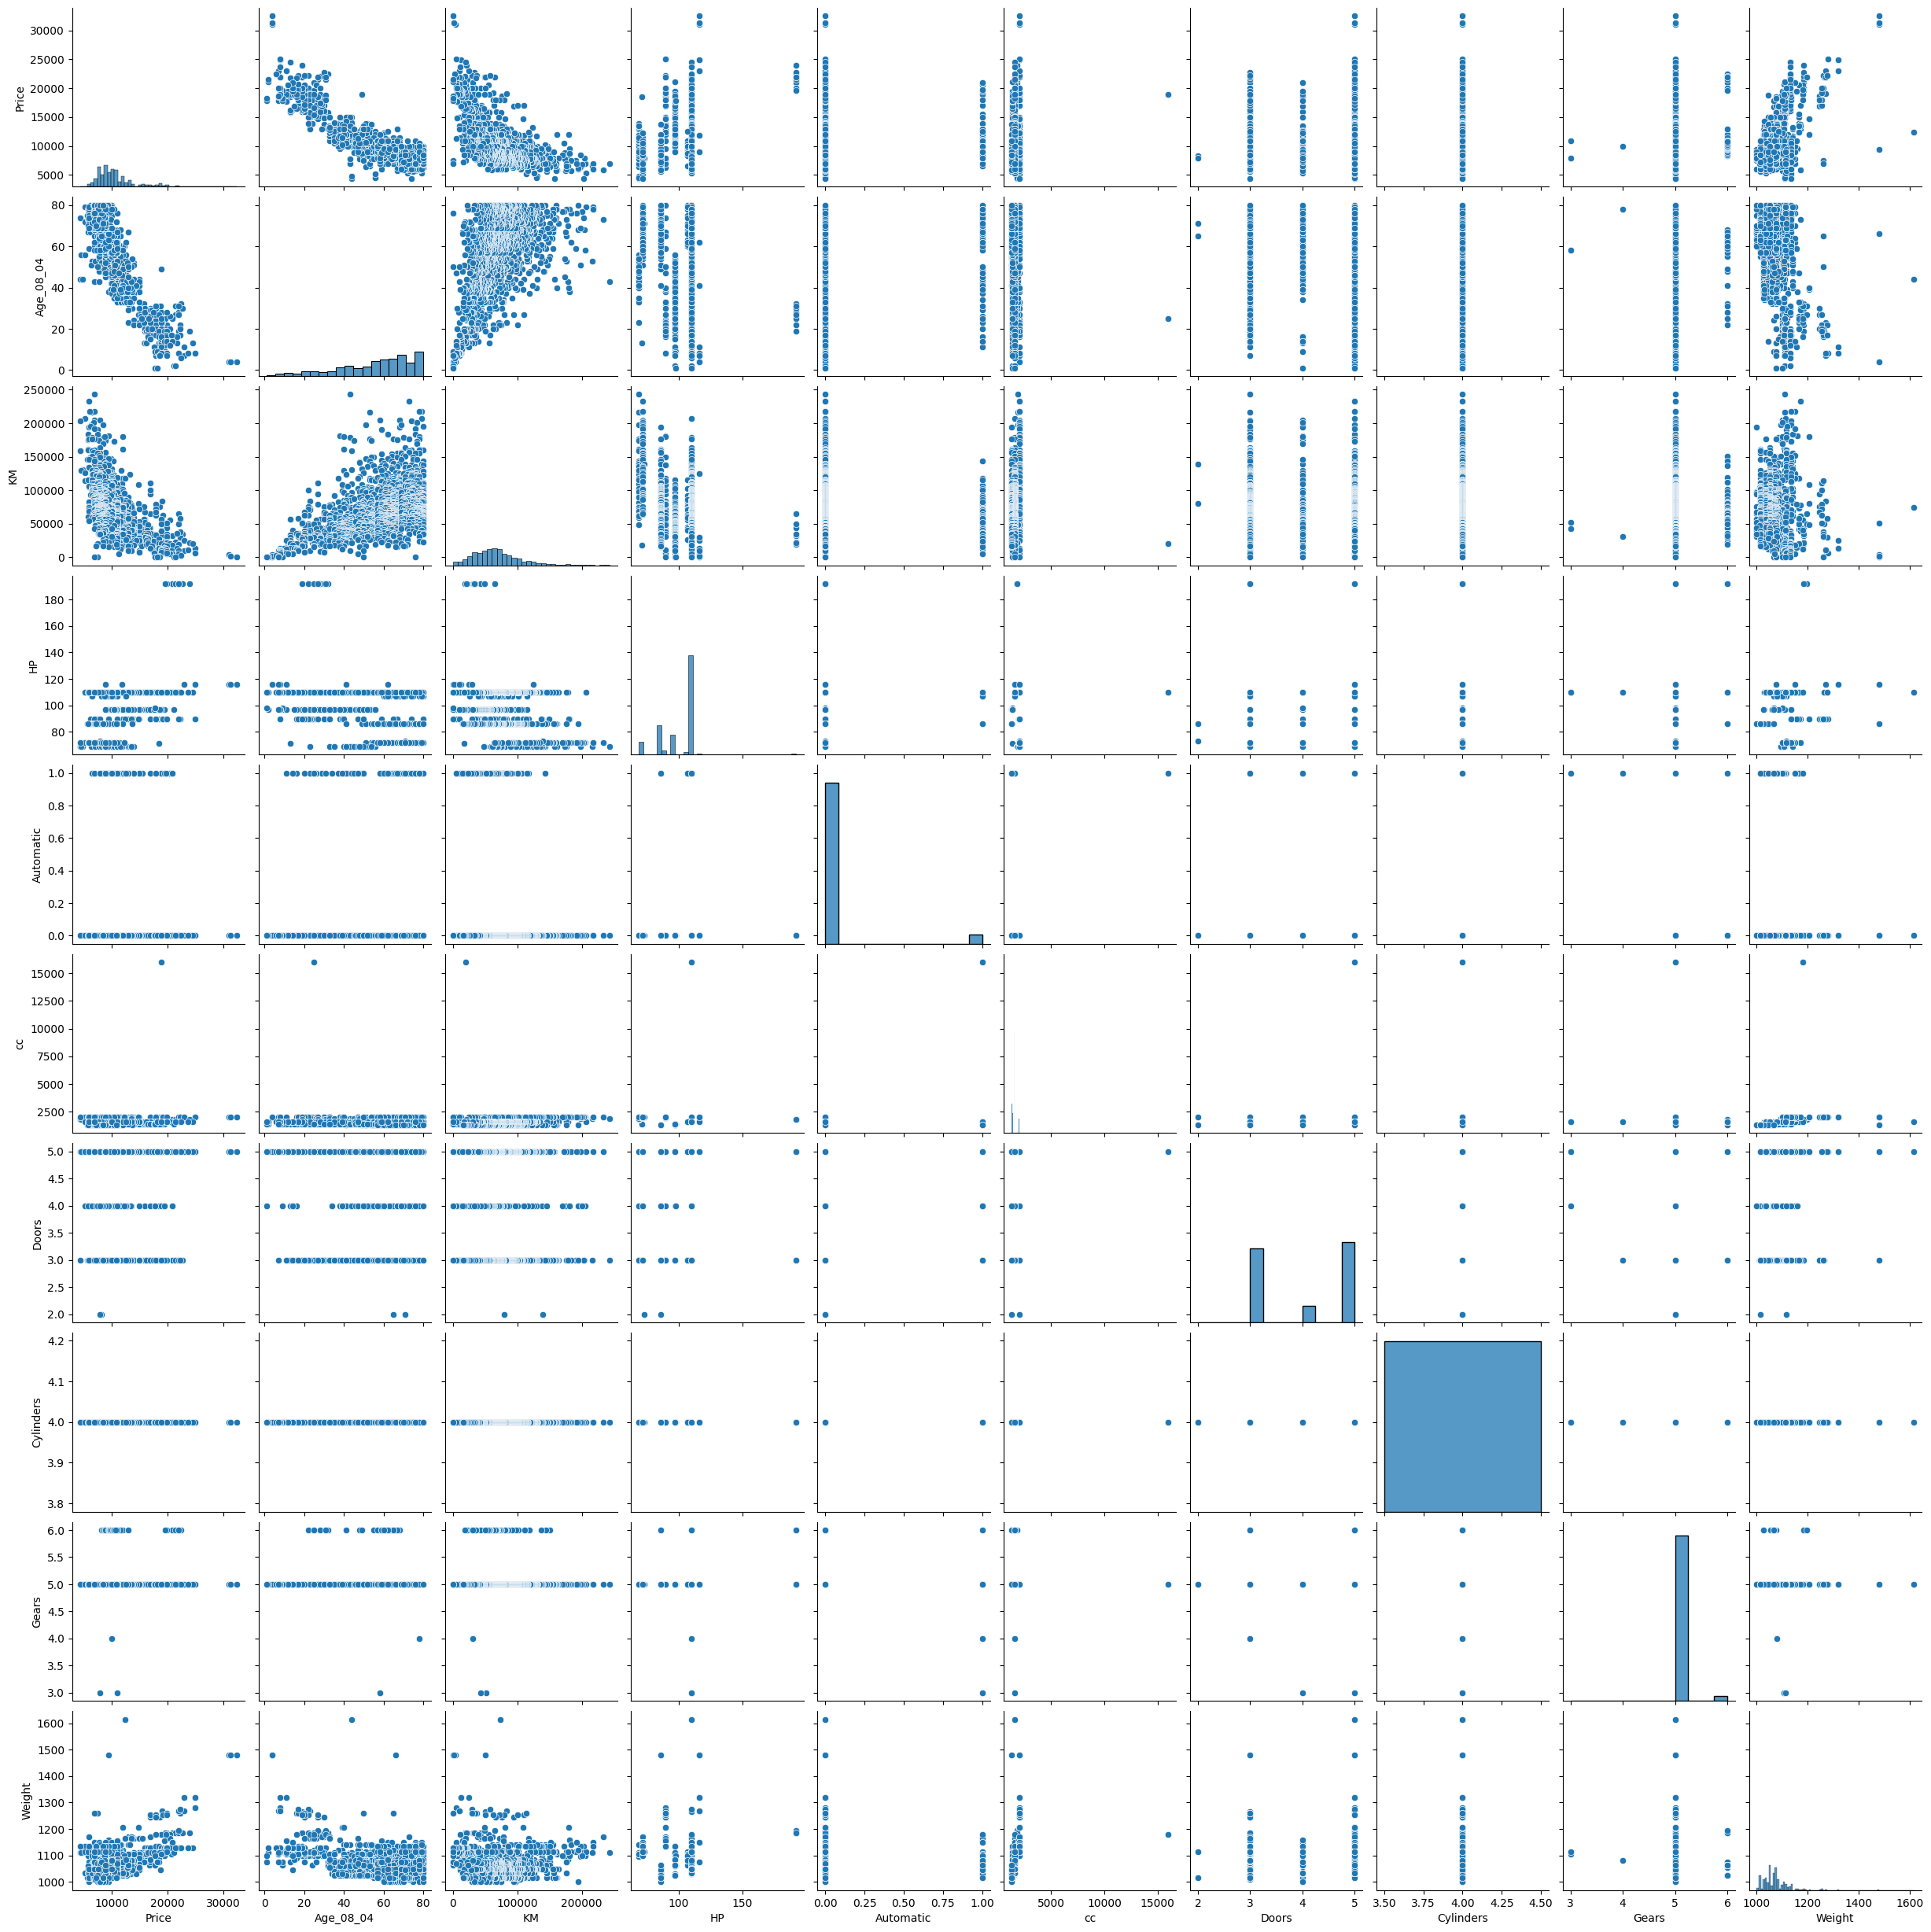

In [10]:
sns.pairplot(data)
plt.show()

In [11]:
data=pd.get_dummies(data,columns=['Fuel_Type'],drop_first=True)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()

In [14]:
data[numerical_features]=scaler.fit_transform(data[numerical_features])

In [15]:
print(data.head())

      Price  Age_08_04        KM        HP  Automatic        cc     Doors  \
0  0.763763  -1.771966 -0.574695 -0.768042          0  0.997419 -1.085139   
1  0.832715  -1.771966  0.117454 -0.768042          0  0.997419 -1.085139   
2  0.887877  -1.718184 -0.715386 -0.768042          0  0.997419 -1.085139   
3  1.163685  -1.610620 -0.547650 -0.768042          0  0.997419 -1.085139   
4  0.832715  -1.395491 -0.801028 -0.768042          0  0.997419 -1.085139   

   Cylinders     Gears    Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
0          4 -0.140425  1.758561              True             False  
1          4 -0.140425  1.758561              True             False  
2          4 -0.140425  1.758561              True             False  
3          4 -0.140425  1.758561              True             False  
4          4 -0.140425  1.853577              True             False  


In [16]:
from sklearn.model_selection import train_test_split
X=data.drop(columns='Price')
y=data['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [18]:
lr1=LinearRegression ()
lr1.fit(X_train,y_train)

LinearRegression()

In [19]:
print(lr1.coef_)

[-6.19649037e-01 -1.67849053e-01  5.79896895e-02  4.10488638e-02
 -3.55381401e-03 -1.58415813e-02  1.80411242e-16  2.86692887e-02
  3.75689692e-01 -1.89063432e-02  3.78081017e-01]


In [21]:
X_train_const = sm.add_constant(X_train)

In [23]:
print(data.dtypes)

Price               float64
Age_08_04           float64
KM                  float64
HP                  float64
Automatic             int64
cc                  float64
Doors               float64
Cylinders             int64
Gears               float64
Weight              float64
Fuel_Type_Diesel       bool
Fuel_Type_Petrol       bool
dtype: object


In [24]:
print(data.isnull().sum())

Price               0
Age_08_04           0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight              0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64


In [25]:
data = data.apply(pd.to_numeric, errors='coerce')

In [26]:
data= data.dropna()

In [27]:
print(data.isnull().sum())

Price               0
Age_08_04           0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight              0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64


In [29]:
X=data.drop(columns='Price')
y=data['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
X_train_const = sm.add_constant(X_train)

In [31]:
model=sm.OLS(y_train,X_train_const).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [34]:

non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols)
data_numeric = data.drop(columns=non_numeric_cols)
X = data_numeric.drop(columns='Price')
y = data_numeric['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Non-numeric columns: Index(['Fuel_Type_Diesel', 'Fuel_Type_Petrol'], dtype='object')


In [35]:
X_train_const = sm.add_constant(X_train)

In [36]:
model2 = sm.OLS(y_train, X_train_const).fit()

In [38]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     919.3
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        03:41:31   Log-Likelihood:                -473.39
No. Observations:                1148   AIC:                             964.8
Df Residuals:                    1139   BIC:                             1010.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04     -0.6194      0.015    -41.363      0.0

In [39]:
significant_features  = X_train.columns[np.abs(model2.params) < 0.05]
X_train_sig = X_train[significant_features]
X_test_sig = X_test[significant_features]

In [40]:
lr2=LinearRegression()

In [42]:
lr2.fit(X_train_sig,y_train)

LinearRegression()

In [43]:
X_train_int = X_train.copy()
X_train_int['Age_kM'] = X_train['Age_08_04'] * X_train['KM']
X_test_int = X_test.copy()
X_test_int['Age_kM'] = X_test['Age_08_04'] * X_test['KM']

In [44]:
print(X_train_int)

      Age_08_04        KM        HP  Automatic        cc     Doors  Cylinders  \
899    0.325540 -0.246397 -1.035138          0 -0.652594  1.014941          4   
881    0.648233 -0.185773  0.567440          0  0.054555 -0.035099          4   
310   -0.857669 -0.796947  0.567440          0  0.054555  1.014941          4   
1145   1.024708  0.888736  0.567440          0  0.054555  1.014941          4   
31    -1.825749 -0.889070 -0.300623          0 -0.416878 -1.085139          4   
...         ...       ...       ...        ...       ...       ...        ...   
1095   1.078490  1.526796  0.567440          0  0.054555 -1.085139          4   
1130   0.917144  1.028841  0.567440          0  0.054555 -1.085139          4   
1294   1.293619  0.085528  0.567440          0  0.054555  1.014941          4   
860    0.379322 -0.102505 -1.035138          0 -0.652594 -1.085139          4   
1126   1.293619  1.105975  0.567440          0  0.054555 -0.035099          4   

         Gears    Weight   

In [46]:
lr3=LinearRegression()
lr3.fit(X_train_int,y_train)

LinearRegression()

In [62]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred=lr3.predict(X_test_int)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8737240126775355
0.12816908823893286


In [63]:
y_pred=lr3.predict(X_train_int)
print(r2_score(y_train,y_pred))
print(mean_squared_error(y_train,y_pred))

0.8781533394145408
0.1213627179225887


In [66]:
y_pred=lr2.predict(X_test_sig)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.07670241527741495
0.9371394523719575
